<a href="https://colab.research.google.com/github/Festuskipkoech/Festus_data-science/blob/main/Copy_of_IplPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import keras
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import tensorflow as tf


In [ ]:
ipl = pd.read_csv("/content/ipl_data.csv")
ipl.head()


,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [ ]:
ipl.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

In [ ]:
df=ipl.drop(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5','mid', 'striker', 'non-striker'], axis=1)

In [ ]:
X= ipl.drop(['total'], axis=1)
y= ipl ['total']

In [ ]:
#Label Encoding, asigning values to 0 s and 1 s

from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object for each categorical feature
venue_encoder = LabelEncoder()
batting_team_encoder = LabelEncoder()
bowling_team_encoder = LabelEncoder()
striker_encoder = LabelEncoder()
bowler_encoder = LabelEncoder()

# Fit and transform the categorical features with label encoding
X['venue'] = venue_encoder.fit_transform(X['venue'])
X['bat_team'] = batting_team_encoder.fit_transform(X['bat_team'])
X['bowl_team'] = bowling_team_encoder.fit_transform(X['bowl_team'])
X['batsman'] = striker_encoder.fit_transform(X['batsman'])
X['bowler'] = bowler_encoder.fit_transform(X['bowler'])


In [ ]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# convert the 'date_column' to numerical representation before scaling
# using toordinal() method of datetime objects
import datetime as dt
X_train['date'] = X_train['date'].map(dt.datetime.toordinal)
X_test['date'] = X_test['date'].map(dt.datetime.toordinal)


In [ ]:
# feature scaling
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
# fit the scaler on the training data and transform training and testing data
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [ ]:
# define the neural network
model = keras.Sequential([ keras.layers.Input(
    shape = (X_train_scaled.shape[1],)), #input layer
        keras.layers.Dense(512, activation='relu'),
        keras.layers.Dense(216, activation='relu'),
        keras.layers.Dense(1, activation='linear')
])
# Compile the model with Huber
huber_loss = tf.keras.losses.Huber(delta=1.0)
# You can adjust  the 'delta' parameter as needed
model.compile(optimizer='adam', loss=huber_loss)

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 512)                 │           9,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 216)                 │         110,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             217 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 360,725 (1.38 MB)

 Trainable params: 120,241 (469.69 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 240,484 (939.39 KB)

In [ ]:
# train the model
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=1, validation_data=(X_test_scaled, y_test))

Epoch 1/100
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - loss: 6.0813 - val_loss: 6.0732
Epoch 2/100
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 5.8998 - val_loss: 6.3011
Epoch 3/100
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 5.8902 - val_loss: 6.2403
Epoch 4/100
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - loss: 5.8414 - val_loss: 5.9809
Epoch 5/100
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - loss: 5.7315 - val_loss: 5.6454
Epoch 6/100
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - loss: 5.6494 - val_loss: 5.8423
Epoch 7/100
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - loss: 5.5253 - val_loss: 5.6701
Epoch 8/100
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - loss: 5.6159 - val_loss: 5.7489
Epoch 9/100
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - loss: 5.6273 - val_loss: 5.8364
Epoch 10/100
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 5.3669 - val_loss: 5.3014
Epoch 11/100
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - loss: 5.2017 - val_loss: 5.6112
Epoch 12

<Axes: >

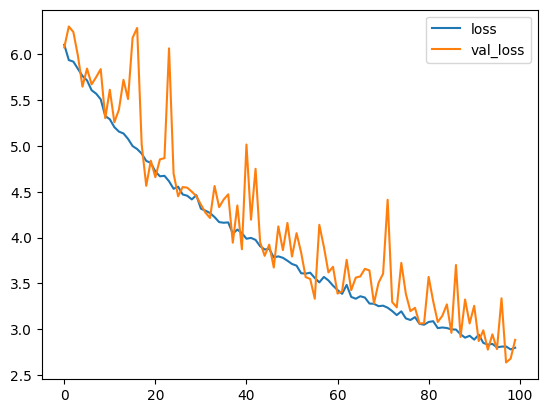

In [ ]:
model_losses= pd.DataFrame(model.history.history)
model_losses.plot()

In [ ]:
# make predictions here
predictions=model.predict(X_test_scaled)

from sklearn.metrics import mean_absolute_error, mean_squared_error
mean_absolute_error(y_test, predictions)

713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


3.34407639503479

In [ ]:
# create interactive widget for predicting the score
import ipywidgets as widgets
from IPython.display import display, clear_output

import warnings
warnings.filterwarnings("ignore")
venue=widgets.Dropdown(options=ipl['venue'].unique().tolist(), description='Select Venue: ')
battling_team=widgets.Dropdown(options=ipl['bat_team'].unique().tolist(), description='Select battling Team: ')
bowling_team=widgets.Dropdown(options=ipl['bowl_team'].unique().tolist(), description='Select batting: ')
striker=widgets.Dropdown(options=ipl['batsman'].unique().tolist(), description='Select striker: ')
bowler=widgets.Dropdown(options=ipl['bowler'].unique().tolist(), description='Select bowler: ')
predict_button=widgets.Button(description='Predict score')

def predict_score(b):
  with output:
    clear_output()
    # clear previous output
    decoded_venue=venue_encoder.transform([venue.value])
    decoded_battling_team=batting_team_encoder.transform([battling_team.value])
    decoded_bowling_team=bowling_team_encoder.transform([bowling_team.value])
    decoded_striker=striker_encoder.transform([striker.value])
    decoded_bowler=bowler_encoder.transform([bowler.value])

    # Create a DataFrame with all the original features
    input_df = pd.DataFrame({
        'venue': decoded_venue,
        'bat_team': decoded_battling_team,
        'bowl_team': decoded_bowling_team,
        'batsman': decoded_striker,
        'bowler': decoded_bowler,
        # Add other features with default values (e.g., 0)
        'date': [0],  # Or any appropriate default value
        'runs': [0],
        'wickets': [0],
        'overs': [0],
        'runs_last_5': [0],
        'wickets_last_5': [0],
        'mid': [0],
        'striker': [0],
        'non-striker': [0],
        'total': [0] # We are predicting this
        # ... add other features with default values
    })

    # Select only the features used for training
    input_df = input_df[['venue', 'bat_team', 'bowl_team', 'batsman', 'bowler','date','runs','wickets','overs','runs_last_5','wickets_last_5','mid','striker','non-striker']]

    # Now you can scale the input data
    input_scaled = scaler.transform(input_df)

    # Make prediction
    predicted_score=model.predict(input_scaled)
    predicted_score=int(predicted_score[0,0])
    print(f"Predicted score: {predicted_score}")

In [ ]:
predict_button.on_click(predict_score)
output = widgets.Output()
display(venue, battling_team, bowling_team, striker, bowler, predict_button, output)

Dropdown(description='Select Venue: ', options=('M Chinnaswamy Stadium', 'Punjab Cricket Association Stadium, …

Dropdown(description='Select battling Team: ', options=('Kolkata Knight Riders', 'Chennai Super Kings', 'Rajas…

Dropdown(description='Select batting: ', options=('Royal Challengers Bangalore', 'Kings XI Punjab', 'Delhi Dar…

Dropdown(description='Select striker: ', options=('SC Ganguly', 'BB McCullum', 'RT Ponting', 'DJ Hussey', 'Moh…

Dropdown(description='Select bowler: ', options=('P Kumar', 'Z Khan', 'AA Noffke', 'JH Kallis', 'SB Joshi', 'C…

Button(description='Predict score', style=ButtonStyle())

Output()